In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
X = iris.data  # Features
y = iris.target

In [5]:
y_encoded = to_categorical(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [7]:
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),
    Dense(3, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 7: Predict and Display Probabilities
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example flower features
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)

Test Accuracy: 90.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [10]:

print("\nPredicted Probabilities (Softmax Output):", prediction)
print("Predicted Class:", iris.target_names[predicted_class])


Predicted Probabilities (Softmax Output): [[9.6107572e-01 3.8675901e-02 2.4836522e-04]]
Predicted Class: setosa


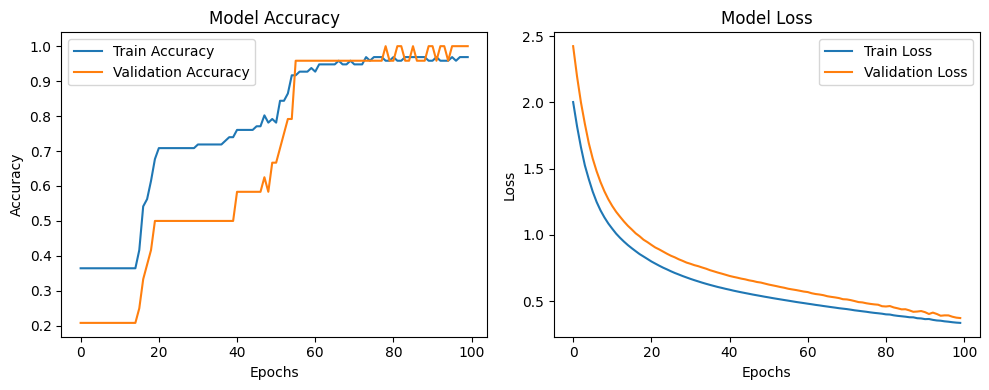

In [11]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()